1.1. Since interest rate is constant, $P(t_m,t_m) = P(t_i, t_m) e^{r(t_m - t_i)} = 1$. So $P(t_i,t_m) = e^{-r(t_m - t_i)}$.

1.2. Risk neutral dynamics considers
\begin{equation}
    S(t_i) e^{r \Delta t} = \mathbb{E} S(t_{i + 1}) = S(t_i)(pu + (1 - p)d)
\end{equation}
This follows
\begin{equation}
    p = \frac{e^{r \Delta t} - d}{u - d}
\end{equation}
For $0 < p < 1$
\begin{equation}
    d < e^{r \Delta t} < u
\end{equation}
Since $ud = 1$
\begin{equation}
    1 < ue^{r \Delta t} < u^2
\end{equation}
\begin{equation}
    p = \frac{ue^{r \Delta t} - 1}{u^2 - 1}
\end{equation}

In [ ]:
import numpy
import matplotlib.pyplot

In [ ]:
M = 100
S_0 = 50
K = 70
u = 1.05
d = 1 / u
r = 0.01

def get_proba(r, u, d, M):
    return (numpy.exp(r / M) - d) / (u - d)

p = get_proba(r, u, d, M)
print(p)

0.48882931951390296


1.3. In case $t_0 = 0$ and $t_M = 1$, we get $\Delta t = \frac1{M}$. Let us denote
\begin{equation}
    S_{j,i} = S_0 u^j d^{i - j} = S_0 u^{2j - i}
\end{equation}
where $i$ corresponds to time $t_i$ and $j$ is a number of time periods before $t_i$ when price goes up.
According to risk neutral dynamics for European option price
\begin{equation}
    V_{j,i} = e^{-r \Delta t} (p V_{j + 1,i + 1} + (1 - p) V_{j,i + 1})
\end{equation}
for the next step $i + 2$ we get
\begin{multline}
    V_{j,i} = e^{-r \Delta t} (p V_{j + 1,i + 1} + (1 - p) V_{j,i + 1}) =\\
    = e^{-2r \Delta t} (p(p V_{j + 2,i + 2} + (1 - p) V_{j + 1,i + 2}) + (1 - p)(p V_{j + 1,i + 2} + (1 - p) V_{j,i + 2})) =\\
    = e^{-2r \Delta t} (p^2 V_{j + 2,i + 2} + 2p(1 - p) V_{j + 1,i + 2} + (1 - p)^2 V_{j,i + 2})
\end{multline}
In general
\begin{equation}
    V_{j,i} = e^{-rM \Delta t} \sum \limits_{k = 0}^{M} C_M^k p^k (1 - p)^{M - k} V_{j + k,i + M}
\end{equation}
For our case $i = 0$, $j = 0$ at $t_0 = 0$ and $\Delta t = \frac1{M}$ we obtain
\begin{equation}
    V_{0,0} = e^{-r} \sum \limits_{k = 0}^{M} C_M^k p^k (1 - p)^{M - k} V_{k,M} = e^{-r} \sum \limits_{j = 0}^{M} C_M^j p^j (1 - p)^{M - j} V_{j,M}
\end{equation}
where $V_{j,M} = (S_{j, M} - K)^{+}$ is call option price at maturity.

In [ ]:
# return the price of call option at maturity t_M = 1 where j is number of upward moves
def price_mature_call(S_0, K, u, d, M):
    S_M = numpy.zeros(M + 1)
    for j in range(M + 1):
        S_M[j] = S_0 * (u ** j) * (d ** (M - j))
    return numpy.maximum(S_M - K, 0)

mature_layer = price_mature_call(S_0, K, u, d, M)
mature_layer

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 3.87277219e+00, 1.14447313e+01,
      

In [ ]:
# use recurrent formula to calculate the price for previous period
def price_previous_layer(M, p, current_layer):
    return p * current_layer[1:] + \
      (1 - p) * current_layer[:-1]

price_previous_layer(M, p, mature_layer)

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.89312459e+00, 7.57416783e+00, 1.55255200e+01,
      

In [ ]:
M_array = numpy.arange(1, 10001, 100)
european_call_prices = numpy.zeros(len(M_array))
for counter in range(len(M_array)):
    M = M_array[counter]
    p = get_proba(r, u, d, M)
    current_layer = price_mature_call(S_0, K, u, d, M)
    for layer in range(M):
        current_layer = price_previous_layer(M, p, current_layer)
    european_call_prices[counter] = numpy.exp(-r) * current_layer[0]

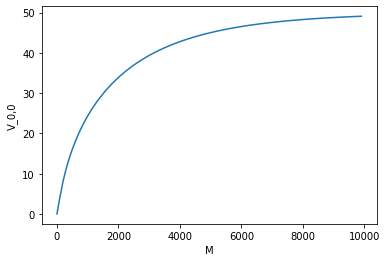

In [ ]:
matplotlib.pyplot.plot(M_array, european_call_prices)
matplotlib.pyplot.xlabel("M")
matplotlib.pyplot.ylabel("V_0,0")
matplotlib.pyplot.show()

If the convergence rate is $O(1/M)^k$, we can calcuate $\frac{V(4M) - V(2M)}{V(2M) - V(M)} = 2^{-k}$. Let us take $M = 2500$.

In [ ]:
# 2^(-k)
(european_call_prices[99] - european_call_prices[49]) / (european_call_prices[49] - european_call_prices[24])

0.5039352615896171

Therefore, k = 1. Convergence rate is $O(1/M)$.

1.4. Let us choose $\Delta$ at time $t_i$ such that the portfolio become riskless at time $t_{i+1}$:
\begin{equation}
  \Pi_i = e^{-r/M} \Pi_{i+1} = S_i \Delta - V_i
\end{equation}
where portfolio $\Pi_i$ consists of $\Delta$ stocks $S_i$ and short position of one option written on this asset.
\begin{equation}
\begin{aligned}
  &\Pi_{i+1} = \Pi^{(u)} = \Pi^{(d)} \\
  &u S_i \Delta - V_{i+1}^{(u)} = d S_i \Delta - V_{i+1}^{(d)} \\
  &\Delta = \frac{V_{i+1}^{(u)} - V_{i+1}^{(d)}}{S_i(u - d)}
\end{aligned}
\end{equation}
We can update portfolio every step $1/M$, so we replicate the option exactly.

1.5. For an American put we have:
\begin{equation}
\begin{aligned}
  &V_{j,M} = (K - S_{j, M})^{+} \\
  &V_{j,i} = \max \{(K - S_{j, i})^{+}, e^{-r \Delta t} (p V_{j + 1,i + 1} + (1 - p) V_{j,i + 1}) \}
\end{aligned}
\end{equation}

In [ ]:
K = 35

In [ ]:
# return the price of put option at maturity t_M = 1 where j is number of upward moves
def price_mature_put(S_0, K, u, d, M):
    S_M = numpy.zeros(M + 1)
    for j in range(M + 1):
        S_M[j] = S_0 * (u ** j) * (d ** (M - j))
    return numpy.maximum(K - S_M, 0)

mature_layer = price_mature_put(S_0, K, u, d, M)
mature_layer

array([35., 35., 35., ...,  0.,  0.,  0.])

In [ ]:
M_array = numpy.arange(1, 10001, 100)
american_put_prices = numpy.zeros(len(M_array))
for counter in range(len(M_array)):
    M = M_array[counter]
    p = get_proba(r, u, d, M)
    current_layer = price_mature_put(S_0, K, u, d, M)
    for layer in range(M):
        next_layer = price_previous_layer(M, p, current_layer)
        current_layer = current_layer[:-1] / u
        current_layer = numpy.maximum(current_layer, next_layer)
    american_put_prices[counter] = numpy.exp(-r) * current_layer[0]

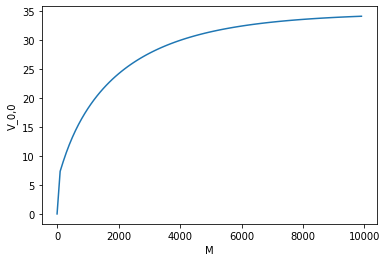

In [ ]:
matplotlib.pyplot.plot(M_array, american_put_prices)
matplotlib.pyplot.xlabel("M")
matplotlib.pyplot.ylabel("V_0,0")
matplotlib.pyplot.show()

In [ ]:
# 2^(-k)
(american_put_prices[99] - american_put_prices[49]) / (american_put_prices[49] - american_put_prices[24])

0.5107433421868195

Same, convergence rate is $O(1/M)$.